In [86]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [28]:
"""
https://help.aliyun.com/document_detail/151969.html
人脸检测与五官定位
"""

from aliyunsdkfacebody.request.v20191230.DetectFaceRequest import DetectFaceRequest

request = DetectFaceRequest()
request.set_accept_format('json')

filepath="images/test2.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': '9C82A124-9FFD-5723-947C-91043D584A1A', 'Data': {'FaceProbabilityList': [0.9713473320007324], 'LandmarkCount': 105, 'FaceRectangles': [75, 88, 133, 173], 'Landmarks': [73.33972930908203, 145.13458251953125, 99.952392578125, 148.8092498779297, 86.23003387451172, 140.98760986328125, 86.71113586425781, 146.65464782714844, 77.89427185058594, 141.8204803466797, 82.05597686767578, 140.0548858642578, 90.67976379394531, 142.8201904296875, 95.51966857910156, 144.55850219726562, 77.65751647949219, 145.4081573486328, 82.03668975830078, 145.55657958984375, 91.40426635742188, 148.39340209960938, 96.12586212158203, 150.069580078125, 127.393310546875, 145.67654418945312, 172.1039276123047, 139.3528289794922, 148.63037109375, 135.25967407226562, 149.6082305908203, 141.3994140625, 133.9415283203125, 139.9002685546875, 141.37802124023438, 137.40818786621094, 156.69192504882812, 134.5393829345703, 164.90811157226562, 136.27723693847656, 134.5992431640625, 146.34005737304688, 142.25311279296

In [34]:
Data=response["Data"]
Data

{'FaceProbabilityList': [0.9713473320007324],
 'LandmarkCount': 105,
 'FaceRectangles': [75, 88, 133, 173],
 'Landmarks': [73.33972930908203,
  145.13458251953125,
  99.952392578125,
  148.8092498779297,
  86.23003387451172,
  140.98760986328125,
  86.71113586425781,
  146.65464782714844,
  77.89427185058594,
  141.8204803466797,
  82.05597686767578,
  140.0548858642578,
  90.67976379394531,
  142.8201904296875,
  95.51966857910156,
  144.55850219726562,
  77.65751647949219,
  145.4081573486328,
  82.03668975830078,
  145.55657958984375,
  91.40426635742188,
  148.39340209960938,
  96.12586212158203,
  150.069580078125,
  127.393310546875,
  145.67654418945312,
  172.1039276123047,
  139.3528289794922,
  148.63037109375,
  135.25967407226562,
  149.6082305908203,
  141.3994140625,
  133.9415283203125,
  139.9002685546875,
  141.37802124023438,
  137.40818786621094,
  156.69192504882812,
  134.5393829345703,
  164.90811157226562,
  136.27723693847656,
  134.5992431640625,
  146.34005737

In [33]:
FaceProbabilityList=Data["FaceProbabilityList"]
FaceProbabilityList # 截图中包含人脸的概率，取值范围0~1。如有多个人脸，则依次返回

[0.9713473320007324]

In [43]:
FaceRectangles=Data["FaceRectangles"]
FaceRectangles # 返回人脸矩形框，分别是[left, top, width, height]。如有多个人脸，则依次顺延，返回矩形框。例如有两个人脸则返回
# [left1, top1, width1, height1, left2, top2, width2, height2]
left=FaceRectangles[0]
top=FaceRectangles[1]
width=FaceRectangles[2]
height=FaceRectangles[3]

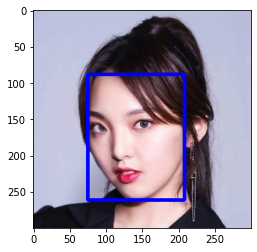

In [45]:
img=plt.imread(filepath)
res=cv2.rectangle(img,(left,top), (left+width,top+height),(0,0,255), 4)
plt.imshow(res)

In [46]:
LandmarkCount=Data["LandmarkCount"]
LandmarkCount # 人脸特征点数目，目前固定为105点。依次为：眉毛24点，眼睛32点，鼻子6点，嘴巴34点，外轮廓9点。

105

In [47]:
Landmarks=Data['Landmarks']
Landmarks

[73.33972930908203,
 145.13458251953125,
 99.952392578125,
 148.8092498779297,
 86.23003387451172,
 140.98760986328125,
 86.71113586425781,
 146.65464782714844,
 77.89427185058594,
 141.8204803466797,
 82.05597686767578,
 140.0548858642578,
 90.67976379394531,
 142.8201904296875,
 95.51966857910156,
 144.55850219726562,
 77.65751647949219,
 145.4081573486328,
 82.03668975830078,
 145.55657958984375,
 91.40426635742188,
 148.39340209960938,
 96.12586212158203,
 150.069580078125,
 127.393310546875,
 145.67654418945312,
 172.1039276123047,
 139.3528289794922,
 148.63037109375,
 135.25967407226562,
 149.6082305908203,
 141.3994140625,
 133.9415283203125,
 139.9002685546875,
 141.37802124023438,
 137.40818786621094,
 156.69192504882812,
 134.5393829345703,
 164.90811157226562,
 136.27723693847656,
 134.5992431640625,
 146.34005737304688,
 142.25311279296875,
 143.7599639892578,
 157.55010986328125,
 140.36044311523438,
 165.3812255859375,
 140.08865356445312,
 80.25496673583984,
 161.087509

In [50]:
Landmarks
# 人脸特征点数目，目前固定为105点。依次为：眉毛24点，眼睛32点，鼻子6点，嘴巴34点，外轮廓9点。

[73.33972930908203,
 145.13458251953125,
 99.952392578125,
 148.8092498779297,
 86.23003387451172,
 140.98760986328125,
 86.71113586425781,
 146.65464782714844,
 77.89427185058594,
 141.8204803466797,
 82.05597686767578,
 140.0548858642578,
 90.67976379394531,
 142.8201904296875,
 95.51966857910156,
 144.55850219726562,
 77.65751647949219,
 145.4081573486328,
 82.03668975830078,
 145.55657958984375,
 91.40426635742188,
 148.39340209960938,
 96.12586212158203,
 150.069580078125,
 127.393310546875,
 145.67654418945312,
 172.1039276123047,
 139.3528289794922,
 148.63037109375,
 135.25967407226562,
 149.6082305908203,
 141.3994140625,
 133.9415283203125,
 139.9002685546875,
 141.37802124023438,
 137.40818786621094,
 156.69192504882812,
 134.5393829345703,
 164.90811157226562,
 136.27723693847656,
 134.5992431640625,
 146.34005737304688,
 142.25311279296875,
 143.7599639892578,
 157.55010986328125,
 140.36044311523438,
 165.3812255859375,
 140.08865356445312,
 80.25496673583984,
 161.087509

In [82]:
def get_X_Y(data):

    list2=[]
    for index,value in  enumerate(data):
        if index%2==0:
            list2.append([int(data[index]),int(data[index+1])])
    return list2
        
Eyebrows=get_X_Y(Landmarks[:48])
Eyes=get_X_Y(Landmarks[48:112])
Nose=get_X_Y(Landmarks[112:124])
Mouth=get_X_Y(Landmarks[124:192])
Outercontour=get_X_Y(Landmarks[192:])

In [107]:
colors=[[ int(i) for i in [ i*255 for i in color]] for color in sns.color_palette("hls",5)]
colors

[[219, 94, 86], [184, 219, 86], [86, 219, 147], [86, 131, 219], [200, 86, 219]]

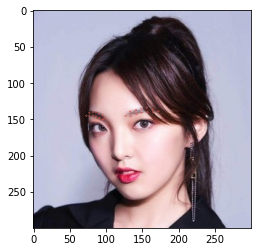

In [121]:
img=plt.imread(filepath)
for lines in Eyebrows:
    # {'X': 113, 'Y': 225}
    center=(lines[0],lines[1])
    cv2.circle(img, center, 1, colors[0])
plt.imshow(img)

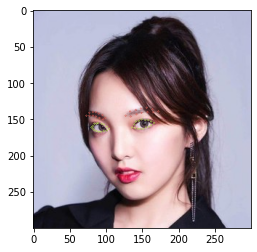

In [122]:
for lines in Eyes:
    # {'X': 113, 'Y': 225}
    center=(lines[0],lines[1])
    cv2.circle(img, center, 1, colors[1])
plt.imshow(img)

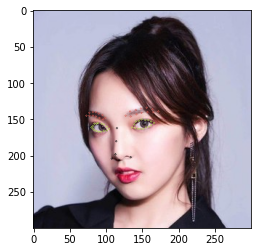

In [127]:
for lines in Nose:
    # {'X': 113, 'Y': 225}
    center=(lines[0],lines[1])
    cv2.circle(img, center, 1, (0,0,0))
plt.imshow(img)

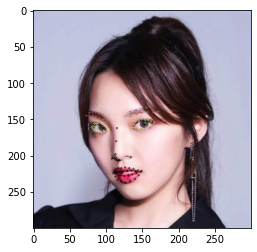

In [128]:
for lines in Mouth:
    # {'X': 113, 'Y': 225}
    center=(lines[0],lines[1])
    cv2.circle(img, center, 1, (0,0,0))
plt.imshow(img)

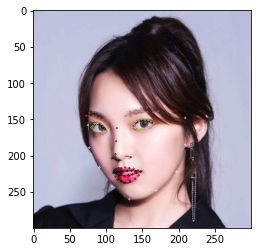

In [131]:
for lines in Outercontour:
    # {'X': 113, 'Y': 225}
    center=(lines[0],lines[1])
    cv2.circle(img, center, 1, (255,255,255))
plt.imshow(img)

In [ ]:
"""
'Qualities':  人脸质量情况，分数越高表示越有利于识别。
        {'ScoreList': [90.26331329345703],
          'NoiseList': [99.47721099853516],
          'BlurList': [99.99376678466797],
          'FnfList': [100.0],
          'GlassList': [99.98408508300781],
          'MaskList': [86.59868621826172],
          'IlluList': [99.99360656738281],
          'PoseList': [7.566176891326904]
          },
 'FaceCount': 1, 检测出的人脸个数。

 'Pupils': 左右两个瞳孔的中心点坐标和半径
         [94.2857437133789,
          161.79794311523438,
          4.954795837402344,
          152.37928771972656,
          155.88494873046875,
          4.954795837402344],
          
 'PoseList': [-17.756900787353516, -6.129109859466553, -6.328291893005371]
         返回人脸姿态，格式为[yaw, pitch, roll]。如有多个人脸，则依次顺延。
        yaw为左右角度，取值范围-90~90。
        pitch为上下角度，取值范围-90~90。
        roll为平面旋转角度，取值范围-180~180。
 """